In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!nproc

2


In [ ]:
# Para crear procesos
import os

# Para trabajar con arrelgos numpy, una herramienta potente para todo lo que es 
# calculo numerico
import numpy as np 

#Para graficar
import matplotlib.pyplot as plt

# Para trabajar con datasets, se usa mucho para analisis de datos
import pandas as pd

In [ ]:
def plot(ths, time, std, filtro):

    fig, ax = plt.subplots()
    ax.plot(ths, time,'b-', color='blue')
    if np.any(std) != 0:
        ax.fill_between(ths, time-std, time+std, color='turquoise')


    ax.set(xlabel='#Threads', ylabel='Time (s)',
           title='Performance ' + filtro + ' multi-thread')
    ax.grid()

    fig.savefig("test.png")
    plt.show()

In [ ]:
! unzip "/content/drive/My Drive/tp2-IMAGINE.zip"

In [ ]:
! cd tp2-IMAGINE/src/;g++ -pthread -Ofast -o algo main.cpp ppm.cpp helper.cpp filters.cpp

In [ ]:
#PRUEBA BRIGHTNESS TOTORO
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main brightness " + str(n_threads) +  " 0.5 imgs/totoro.ppm out/salida.ppm 0"  
  os.system(cmd)

# Levantamos un csv en un dataframe de pandas
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

# Quedarse con las filas > 0.02
#dataframe[dataframe['Time']  > 0.02]


,Width,Time,Threads
0,989,0.025892,1
1,989,0.021786,2
2,989,0.023807,3
3,989,0.021260,4
4,989,0.023000,5
5,989,0.022119,6
6,989,0.022616,7
7,989,0.023208,8
8,989,0.023033,9
9,989,0.022679,10


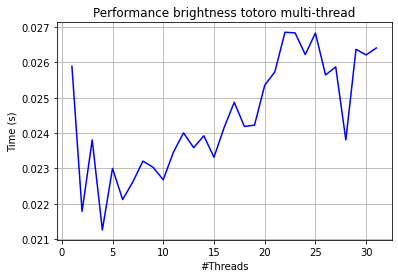

In [ ]:
ths = dataframe['Threads']
time = dataframe['Time']
plot(ths,time, 0, 'brightness totoro')

In [ ]:
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main brightness " + str(n_threads) +  " 0.5 imgs/totoro.ppm out/salida.ppm 0"
  for i in range(20):
      os.system(cmd)
  
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

,Width,Time,Threads
0,989,0.024693,1
1,989,0.025257,1
2,989,0.024341,1
3,989,0.027760,1
4,989,0.025442,1
...,...,...,...
615,989,0.026287,31
616,989,0.026856,31
617,989,0.030856,31
618,989,0.023194,31


In [ ]:
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1     0.024651
2     0.022569
3     0.022122
4     0.022290
5     0.022625
6     0.022353
7     0.023349
8     0.023463
9     0.022427
10    0.023174
11    0.023046
12    0.024093
13    0.023994
14    0.024399
15    0.024295
16    0.024241
17    0.024383
18    0.024603
19    0.024030
20    0.024455
21    0.025120
22    0.025369
23    0.025475
24    0.028993
25    0.027189
26    0.025977
27    0.026741
28    0.025921
29    0.027137
30    0.026385
31    0.026204
Name: Time, dtype: float64

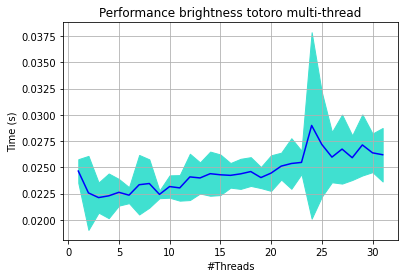

Ganancia maxima: 23.699704070581596 %


In [ ]:
# Graficamos el costo (time) en funcion de la cantidad de threads
ths = np.arange(1,32)

plot(ths,df_mean_time, df_std_time, 'brightness totoro' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")
#FIN PRUEBA BRIGHTNESS TOTORO

In [ ]:
#PRUEBA BOXBLUR TOTORO
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main boxblur " + str(n_threads) +  " 0 imgs/totoro.ppm out/salida.ppm 0"  
  os.system(cmd)

# Levantamos un csv en un dataframe de pandas
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

# Quedarse con las filas > 0.02
#dataframe[dataframe['Time']  > 0.02]


,Width,Time,Threads
0,987,0.139804,1
1,987,0.186705,2
2,987,0.289089,3
3,987,0.320734,4
4,987,0.393289,5
5,987,0.793317,6
6,987,0.820430,7
7,987,0.898596,8
8,987,0.722032,9
9,987,0.635246,10


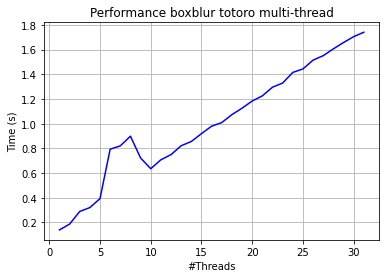

In [ ]:
ths = dataframe['Threads']
time = dataframe['Time']
plot(ths,time, 0, 'boxblur totoro')

In [ ]:
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,32):
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main boxblur " + str(n_threads) +  " 0 imgs/totoro.ppm out/salida.ppm 0"
  for i in range(20):
      os.system(cmd)
  
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

,Width,Time,Threads
0,987,0.169613,1
1,987,0.143294,1
2,987,0.139375,1
3,987,0.157154,1
4,987,0.138266,1
...,...,...,...
615,987,1.676629,31
616,987,1.739101,31
617,987,1.689354,31
618,987,1.687968,31


In [ ]:
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1     0.145495
2     0.194547
3     0.246894
4     0.301277
5     0.355898
6     0.411239
7     0.471179
8     0.524220
9     0.582288
10    0.628875
11    0.691626
12    0.744479
13    0.805606
14    0.933935
15    0.922731
16    0.971269
17    1.020867
18    1.084241
19    1.138107
20    1.187614
21    1.525197
22    1.312366
23    1.408987
24    1.402961
25    1.467678
26    1.470155
27    1.636995
28    1.572582
29    1.617579
30    1.655291
31    1.692402
Name: Time, dtype: float64

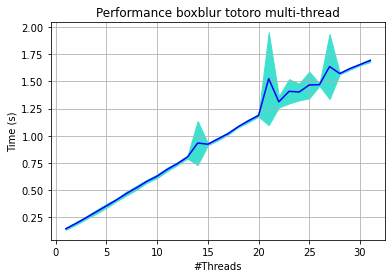

Ganancia maxima: 91.4030277623518 %


In [ ]:
# Graficamos el costo (time) en funcion de la cantidad de threads
ths = np.arange(1,32)

plot(ths,df_mean_time, df_std_time, 'boxblur totoro' )
max = np.max(df_mean_time)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")
#FIN PRUEBA BOXBLUR TOTORO

Agregando la flag de -OFast al codigo de compilacion podemos ver una mejoria  en el timepo promedio de la palicación de los filtros.